In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("height-weight.csv")

In [3]:
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [4]:
x = data['Weight']
y = data['Height']*100

In [5]:
def relu(x,e):
    if type(x) == int:
        if x>e: return x
        else: return 0
    return np.array([i if i>e else 0 for i in x])

def diff(x,y,coef,knot,k):
    dif = np.array(coef[0] + coef[1]*x)
    for i in range(knot):
        dif += coef[i+2]*relu(x,k[i])
    dif -= y
    return dif

def cost_function(x,y,coef,knot,k):
    n = len(x)
    return 1/(2*n)*sum(diff(x,y,coef,knot,k)**2)

def plot_line(x,knot,coef,k):
    l = coef[0] + coef[1]*x
    for i in range(knot):
        l += coef[i+2]*relu(x,k[i])
    return l

In [6]:
class ContinousPiecewiseLinear:
    
    def fit(self,x,y,knot=2):
        self.k = [x.min()+(x.max()-x.min())/(knot+1)*i for i in range(1,knot+1)]
        n = len(x)
        self.coef = [0]*(knot+2)
        cost = cost_function(x,y,self.coef,knot,self.k)
        max_iter = 0
        error=10000
        print('------error------')
        while error>0.1 and max_iter < 1000:
            coef_i = self.coef[:]
            coef_i[0] = coef_i[0] - 0.0001*sum(diff(x,y,self.coef,knot,self.k))/n
            coef_i[1] = coef_i[1] - 0.0001*sum(diff(x,y,self.coef,knot,self.k)*x)/n
            for i in range(knot):
                coef_i[i+2] = coef_i[i+2] - 0.0001*sum(diff(x,y,self.coef,knot,self.k)*relu(x,self.k[i]))/n
            self.coef = coef_i[:]
            error = cost_function(x,y,self.coef,knot,self.k)
            max_iter += 1
            if max_iter%100 == 0 :
                print(error)
        return self.coef
    
    def draw_plot(self,x,y,knot):
        x1 = np.linspace(min(x),max(x))
        plt.plot(x1,plot_line(x1,knot,self.coef,self.k))
        plt.scatter(x,y)
        for i in self.k:
            plt.axvline(i,color='gray', linestyle='--', linewidth='1')

In [7]:
PL = ContinousPiecewiseLinear()

In [8]:
PL.fit(x,y,5)

------error------
1.6031238000492143
0.6074855368998637
0.5774817605576844
0.5763323577618744
0.5762825600007407
0.5762770189321321
0.5762733100017856
0.5762696781554388
0.5762660496048732
0.5762624212199712


[0.0541110659387155,
 2.7993761197331795,
 -0.06219977903289662,
 -0.04773110532128946,
 -0.06713087254676843,
 -0.06565606387589883,
 -0.08239118301712405]

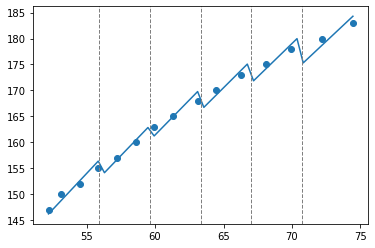

In [9]:
PL.draw_plot(x,y,5)